**UEA:Análisis de Datos con Python**
  
Maestría en Matemáticas Aplicadas

Proyecto Final:Análisis de los Trasplantes de órganos y Tejidos en México (2020-2025)

Rosa Isela Amador Rafael



# Carga y limpieza del conjunto de datos


In [44]:
#Cargar paqueterias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#Cargar los datos y se definen como df

RUTA="https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/transplantes_2020-2025.csv"
df=pd.read_csv(RUTA)
df

,sexo,codigo_sexo,institucion,entidad_federativa_trasplante,codigo_entidad_federativa_trasplante,establecimiento,institucion_organo,entidad_federativa_organo,codigo_entidad_federativa_organo,entidad_federativa_origen,...,codigo_entidad_federativa_residencia,grupo_sanguineo_receptor,rh,edad_al_trasplante_anios,fecha_trasplante,fecha_registro_comite,organo,tipo_trasplante,relacion,resultado_24hrs
0,masculino,1,IMSS,Jalisco,14,Unidad Medica de Alta Especialidad Hospital de...,IMSS,Jalisco,14,Jalisco,...,14,A,positivo,34,2025-02-07,2011-09-08,riñón,cadáver,no aplica,no disponible
1,masculino,1,IMSS,Jalisco,14,Unidad Medica de Alta Especialidad Hospital de...,IMSS,Baja California,2,Jalisco,...,14,A,positivo,39,2025-01-10,2012-12-03,riñón,cadáver,no aplica,no disponible
2,masculino,1,IMSS,Jalisco,14,Unidad Medica de Alta Especialidad Hospital de...,IMSS,Jalisco,14,Jalisco,...,14,A,positivo,37,2025-02-04,2013-05-03,riñón,cadáver,no aplica,no disponible
3,masculino,1,IMSS,Jalisco,14,Unidad Medica de Alta Especialidad Hospital de...,IMSS,Jalisco,14,Jalisco,...,14,O,positivo,29,2025-03-27,2013-09-10,riñón,cadáver,no aplica,no disponible
4,masculino,1,IMSS,Puebla,21,U.M.A.E. Hospital de Especialidades C.M.N. Gra...,IMSS,Puebla,21,Tlaxcala,...,29,O,positivo,34,2025-01-18,2014-01-29,riñón,cadáver,no aplica,no disponible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27356,femenino,2,PRIVADO,Baja California,2,"Centro Oftalmologico de Tijuana, S. de R.L. de...",EXTRANJERO,Extranjero,97,Durango,...,2,no aplica,no aplica,72,2020-03-19,2020-03-17,córnea,córnea importada,no aplica,exitoso
27357,femenino,2,PRIVADO,Baja California,2,"Centro Oftalmologico de Tijuana, S. de R.L. de...",EXTRANJERO,Extranjero,97,Sonora,...,2,no aplica,no aplica,17,2020-03-19,2020-03-17,córnea,córnea importada,no aplica,exitoso
27358,masculino,1,PRIVADO,Ciudad de México,9,Asociacion Para Evitar La Ceguera En Mexico I....,EXTRANJERO,Extranjero,97,Ciudad de México,...,9,O,positivo,58,2020-03-19,2020-03-18,córnea,córnea importada,no aplica,exitoso
27359,masculino,1,PRIVADO,Ciudad de México,9,Asociacion Para Evitar La Ceguera En Mexico I....,EXTRANJERO,Extranjero,97,Veracruz,...,30,O,positivo,30,2020-03-26,2020-03-25,córnea,córnea importada,no aplica,exitoso


In [46]:
#Proporciona la informacion DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   sexo                                  27361 non-null  object
 1   codigo_sexo                           27361 non-null  int64 
 2   institucion                           27361 non-null  object
 3   entidad_federativa_trasplante         27361 non-null  object
 4   codigo_entidad_federativa_trasplante  27361 non-null  int64 
 5   establecimiento                       27361 non-null  object
 6   institucion_organo                    27361 non-null  object
 7   entidad_federativa_organo             27361 non-null  object
 8   codigo_entidad_federativa_organo      27361 non-null  int64 
 9   entidad_federativa_origen             27361 non-null  object
 10  codigo_entidad_federativa_origen      27361 non-null  int64 
 11  entidad_federativa_residenci

| Variable                            | Descripción                                                                           |
| ----------------------------------- | ------------------------------------------------------------------------------------- |
| **sexo**                            | Sexo del receptor (masculino/femenino).                                               |
| **institución**                     | Institución médica responsable del trasplante (IMSS, ISSSTE, hospital estatal, etc.). |
| **entidad\_federativa\_trasplante** | Estado donde se realizó el trasplante.                                                |
| **establecimiento**                 | Nombre específico del hospital o clínica donde se realizó el trasplante.              |
| **institución\_organo**             | Institución que aportó el órgano en caso de donación viva o cadavérica.               |
| **entidad\_federativa\_organo**     | Estado donde se obtuvo el órgano donante.                                             |
| **entidad\_federativa\_origen**     | Estado de origen del paciente receptor.                                               |
| **entidad\_federativa\_residencia** | Estado de residencia habitual del receptor.                                           |
| **grupo\_sanguineo\_receptor**      | Grupo sanguíneo del receptor (A, B, AB, O).                                           |
| **rh**                              | Factor Rh del receptor (positivo o negativo).                                         |
| **edad\_al\_trasplante\_anios**     | Edad en años al momento del trasplante.                                               |
| **fecha\_trasplante**               | Fecha en que se realizó el trasplante.                                                |
| **fecha\_registro\_comite**         | Fecha de registro en comité hospitalario o lista de espera.                           |
| **órgano**                          | Órgano trasplantado (córnea, riñón, hígado, etc.).                                    |
| **tipo\_trasplante**                | Procedencia del órgano: cadáver, vivo o córnea importada.                             |
| **relación**                        | Relación entre donante y receptor (familiar, altruista, no aplica, etc.).             |
| **resultado\_24hrs**                | Resultado del trasplante a 24 horas: exitoso, no exitoso, no disponible, etc.         |


In [47]:
estados_unicos= df['entidad_federativa_origen'].unique()
print(estados_unicos)

['Jalisco' 'Tlaxcala' 'Guanajuato' 'Nayarit' 'Ciudad de México' 'Veracruz'
 'Chiapas' 'Sinaloa' 'Michoacán' 'Oaxaca' 'Estado de México' 'Hidalgo'
 'Querétaro' 'San Luis Potosí' 'Puebla' 'Campeche' 'Morelos' 'Zacatecas'
 'Colima' 'Tabasco' 'Yucatán' 'Guerrero' 'Tamaulipas' 'Sonora'
 'Nuevo León' 'Baja California Sur' 'Aguascalientes' 'Chihuahua'
 'Coahuila' 'Durango' 'Extranjero' 'Baja California' 'Quintana Roo'
 'Michoacan de Ocampo' 'Veracruz de Ignacio de La Llave'
 'Coahuila de Zaragoza' 'Nuevo Leon' 'Mexico' 'Queretaro de Arteaga'
 'Yucatan' 'Vnppe' 'México']


In [48]:
len(estados_unicos)

42

In [49]:
import pandas as pd

# Diccionario de corrección de nombres
mapeo_estados = {
    'Michoacan de Ocampo': 'Michoacán',
    'Veracruz de Ignacio de La Llave': 'Veracruz',
    'Coahuila de Zaragoza': 'Coahuila',
    'Nuevo Leon': 'Nuevo León',
    'Mexico': 'Estado de México',  # Esta línea corrige "Mexico"
    'México': 'Estado de México',  # Esta línea corrige "México"
    'Ciudad de México': 'Ciudad de México',  # Asegúrate de mantener este
    'Queretaro de Arteaga': 'Querétaro',
    'Yucatan': 'Yucatán',
    'Vnppe': None,  # Eliminar este valor
    # Los demás se mantienen igual
}
# Función para limpiar los nombres
def limpiar_estado(estado):
    if estado == 'Extranjero':
        return estado
    return mapeo_estados.get(estado, estado)

# Aplicar la limpieza al DataFrame
df['entidad_federativa_origen'] = df['entidad_federativa_origen'].apply(limpiar_estado)

# Eliminar filas con valores nulos (como 'Vnppe')
df = df.dropna(subset=['entidad_federativa_origen'])

# Verificar los resultados
estados_unicos = df['entidad_federativa_origen'].unique()


In [50]:

# Verificar los resultados
estados_unicos = df['entidad_federativa_origen'].unique()
print(estados_unicos)

['Jalisco' 'Tlaxcala' 'Guanajuato' 'Nayarit' 'Ciudad de México' 'Veracruz'
 'Chiapas' 'Sinaloa' 'Michoacán' 'Oaxaca' 'Estado de México' 'Hidalgo'
 'Querétaro' 'San Luis Potosí' 'Puebla' 'Campeche' 'Morelos' 'Zacatecas'
 'Colima' 'Tabasco' 'Yucatán' 'Guerrero' 'Tamaulipas' 'Sonora'
 'Nuevo León' 'Baja California Sur' 'Aguascalientes' 'Chihuahua'
 'Coahuila' 'Durango' 'Extranjero' 'Baja California' 'Quintana Roo']


In [51]:
len(estados_unicos)

33

In [52]:
estados_unicos1= df['entidad_federativa_residencia'].unique()
print(estados_unicos1)

['Jalisco' 'Tlaxcala' 'Guanajuato' 'Nayarit' 'Michoacán' 'Veracruz'
 'Chiapas' 'Sinaloa' 'No Disponible' 'Oaxaca' 'Ciudad de México' 'Hidalgo'
 'Estado de México' 'Querétaro' 'Puebla' 'Yucatán' 'Morelos' 'Zacatecas'
 'Nuevo León' 'Colima' 'Quintana Roo' 'San Luis Potosí' 'Tamaulipas'
 'Guerrero' 'Baja California Sur' 'Chihuahua' 'Sonora' 'Coahuila'
 'Durango' 'Tabasco' 'Aguascalientes' 'Baja California' 'Campeche'
 'Extranjero' 'Michoacan de Ocampo' 'Veracruz de Ignacio de La Llave'
 'Coahuila de Zaragoza' 'Nuevo Leon' 'Mexico' 'Queretaro de Arteaga'
 'Yucatan' 'México']


In [53]:
mapeo_estados = {
    # Estados con nombres incorrectos o variantes
    'Michoacan de Ocampo': 'Michoacán',
    'Veracruz de Ignacio de La Llave': 'Veracruz',
    'Coahuila de Zaragoza': 'Coahuila',
    'Nuevo Leon': 'Nuevo León',
    'Mexico': 'Estado de México',
    'México': 'Estado de México',
    'Queretaro de Arteaga': 'Querétaro',
    'Yucatan': 'Yucatán',

    # Valores no válidos (se convertirán en NaN y luego se eliminarán)
    'No Disponible': np.nan,
    'Vnppe': np.nan,  # Por si aparece de nuevo
}

# Función para limpiar los nombres
def limpiar_estado(estado):
    if estado == 'Extranjero':
        return estado
    return mapeo_estados.get(estado, estado)

# Aplicar la limpieza al DataFrame
df['entidad_federativa_residencia'] = df['entidad_federativa_residencia'].apply(limpiar_estado)

# Eliminar filas con valores nulos (como 'Vnppe')
df = df.dropna(subset=['entidad_federativa_residencia'])

# Verificar los resultados
estados_unicos1= df['entidad_federativa_residencia'].unique()


/tmp/ipython-input-2965507363.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
estados_unicos1

array(['Jalisco', 'Tlaxcala', 'Guanajuato', 'Nayarit', 'Michoacán',
       'Veracruz', 'Chiapas', 'Sinaloa', 'Oaxaca', 'Ciudad de México',
       'Hidalgo', 'Estado de México', 'Querétaro', 'Puebla', 'Yucatán',
       'Morelos', 'Zacatecas', 'Nuevo León', 'Colima', 'Quintana Roo',
       'San Luis Potosí', 'Tamaulipas', 'Guerrero', 'Baja California Sur',
       'Chihuahua', 'Sonora', 'Coahuila', 'Durango', 'Tabasco',
       'Aguascalientes', 'Baja California', 'Campeche', 'Extranjero'],
      dtype=object)

In [55]:
#Conversión de fechas a formato datetime

df['fecha_trasplante'] = pd.to_datetime(df['fecha_trasplante'], errors='coerce')

df['anio'] = df['fecha_trasplante'].dt.year

#Seleccionamos los organos que deseamos estudiar en este caso son los que tiene mayor número de trasplantes
organos_deseados = ['córnea', 'hígado', 'riñón']
df_filtrado = df[df['organo'].isin(organos_deseados)]



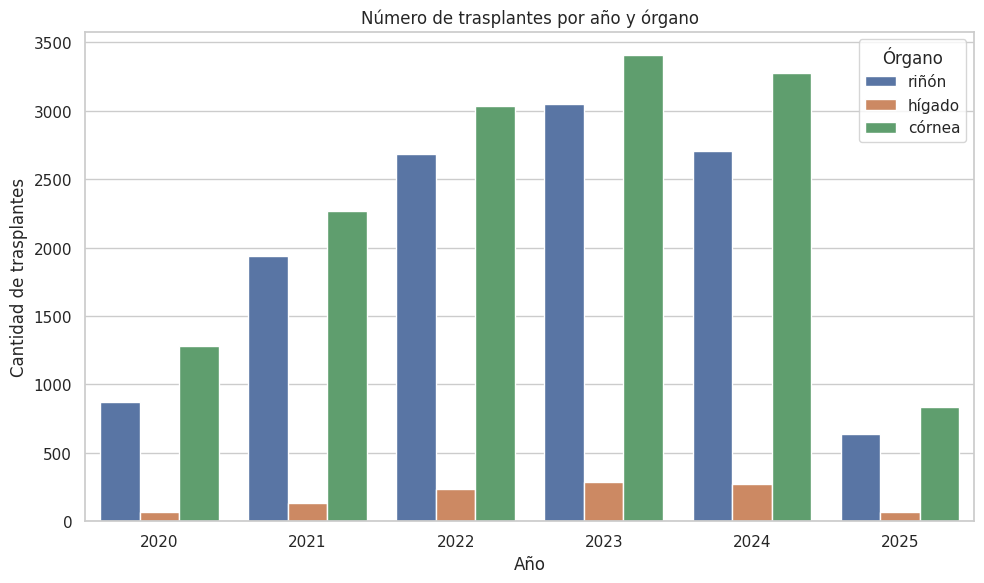

In [56]:
#Número de transplantes por año y órgano

plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtrado, x='anio', hue='organo')
plt.title('Número de trasplantes por año y órgano')
plt.xlabel('Año')
plt.ylabel('Cantidad de trasplantes')
plt.legend(title='Órgano')
plt.xticks()
plt.tight_layout()
plt.show()

**Analisis por año**



*  2020: Nivel bajo (impacto por la pandemia), el de córnea es el más frecuente.

*  2021 a 2023: En este periodo se tiene un aumento progresivo.

*  2023: se alcanza el pico, córnea supera los 3400 trasplantes, riñon llega a más de 3000, mientras que el hígado y corazón crecen pero se mantienen bajos.

*  2024: se comienza un ligero descenso con  respecto a 2023.

*  2025: Se tiene una disminución importante en todod los órganos (puede deberse a que los datos aún están completos)



In [57]:
#Agrupación por clases

df['edad_al_trasplante_anios'] = pd.to_numeric(df['edad_al_trasplante_anios'], errors='coerce')


bins = [0, 18, 40, 65, 120]
labels = ['infantil', 'adulto joven', 'adulto', 'adulto mayor']


df['grupo_edad'] = pd.cut(df['edad_al_trasplante_anios'], bins=bins, labels=labels, right=False)


df['grupo_edad'].value_counts()

,count
grupo_edad,
adulto joven,10381
adulto,9503
adulto mayor,5701
infantil,1727


<Axes: xlabel='grupo_edad', ylabel='count'>

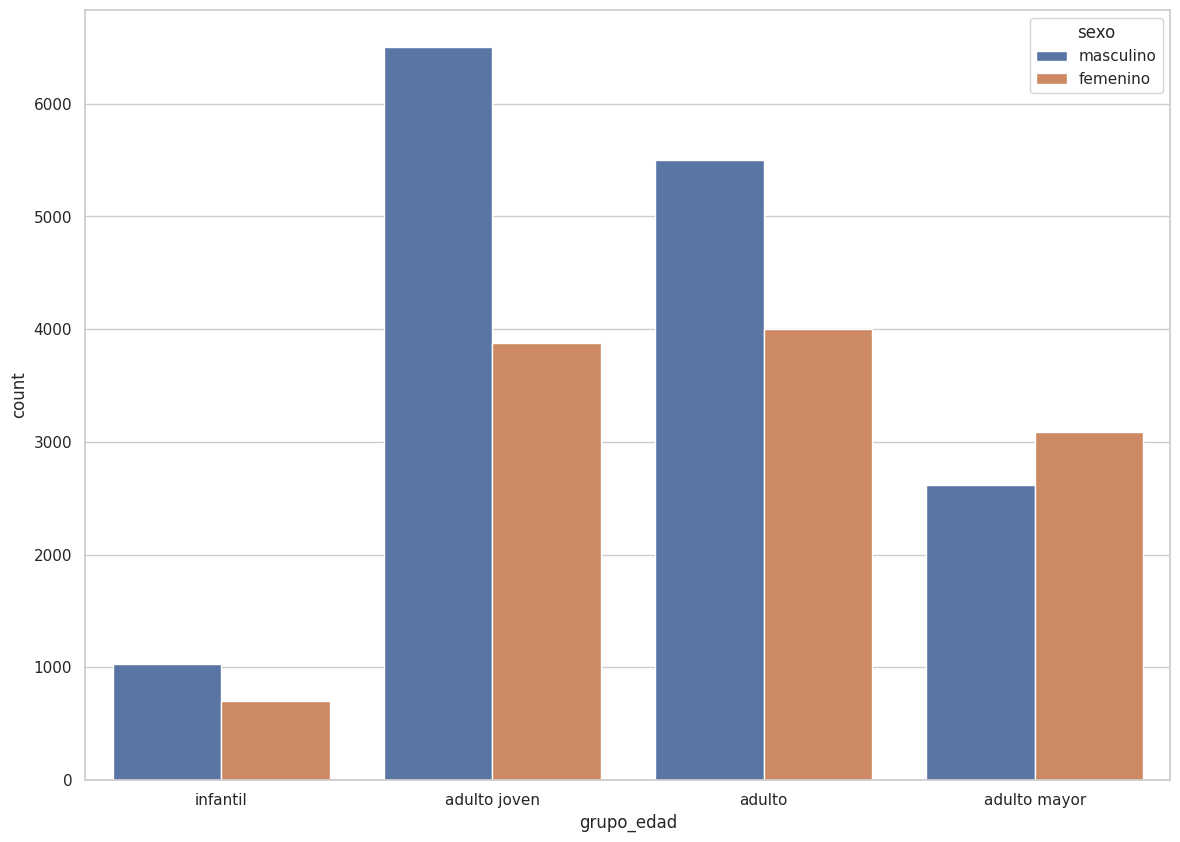

In [58]:
sns.countplot(data=df, x='grupo_edad', hue='sexo')

**Interpretación por grupo es de la siguiente manera:**

 Infantil: Más transplantes en niños que en niñas

 Adulto Joven: Este es grupo con más  transplantes en total y se observa que una notaria diferencia hay más hombres que mujeres

  Adulto: En este grupo se tiene una cantidad casi igual entre hombres y mujeres, aunque ligeramente más hombres.

  Adulto mayor: En este grupo hay más mujeres trasplantadas que hombres.

#

# Análisis Exploratorio de Datos

In [59]:
df.describe()

,codigo_sexo,codigo_entidad_federativa_trasplante,codigo_entidad_federativa_organo,codigo_entidad_federativa_origen,codigo_entidad_federativa_residencia,edad_al_trasplante_anios,fecha_trasplante,anio
count,27312.000000,27312.000000,27312.000000,27312.000000,27312.000000,27312.000000,27312,27312.000000
mean,1.427065,13.196178,27.812354,16.090327,15.495533,45.589960,2023-01-16 11:34:32.056238848,2022.558692
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2020-01-01 00:00:00,2020.000000
25%,1.000000,9.000000,9.000000,9.000000,9.000000,30.000000,2022-01-18 00:00:00,2022.000000
50%,1.000000,11.000000,15.000000,14.000000,15.000000,44.000000,2023-03-02 00:00:00,2023.000000
75%,2.000000,19.000000,25.000000,21.000000,20.000000,62.000000,2024-03-02 00:00:00,2024.000000
max,2.000000,32.000000,97.000000,97.000000,97.000000,98.000000,2025-03-31 00:00:00,2025.000000
std,0.494661,6.943167,31.058812,9.942179,7.871779,19.550789,NaN,1.364965


Estadística descriptiva generales



*   **codigo\_sexo**: media 1.427287, hay  más hombres que mujeres  (57% masculino, 43% femenino)

*   **edad_al_trasplante_anios:**

Media: 45.6 años

Mínima: 0 (bebés o errores)

Máxima: 98 años

Distribución:

25% ≤ 30 años

50% ≤ 44 años

75% ≤ 62 años

Esto sugiere que la mayoría de los trasplantes ocurren en adultos entre 30 y 62 años

*   **fecha_trasplante:**

Va de 2020-01-01 a 2025-03-31

Mediana: 2023-03-04, lo cual indica mayor actividad en 2023.

*   **anio:**

Derivado de fecha_trasplante

Promedio: 2022.56 → concentración en años recientes

Rango: 2020 a 2025

Mediana: 2023

pico de actividad en 2022–2023.

In [60]:
#definimos las 10 primeras instituciones que en donde se realozan los trasplantes
top_inst = df['institucion'].value_counts().nlargest(10).index

In [61]:
top_inst

Index(['IMSS', 'PRIVADO', 'SSA', 'SSE', 'ISSSTE', 'SEDENA', 'IMSS-BIENESTAR',
       'IMSS-BIENESTAR/SSA/SSE', 'SEMAR', 'PEMEX'],
      dtype='object', name='institucion')

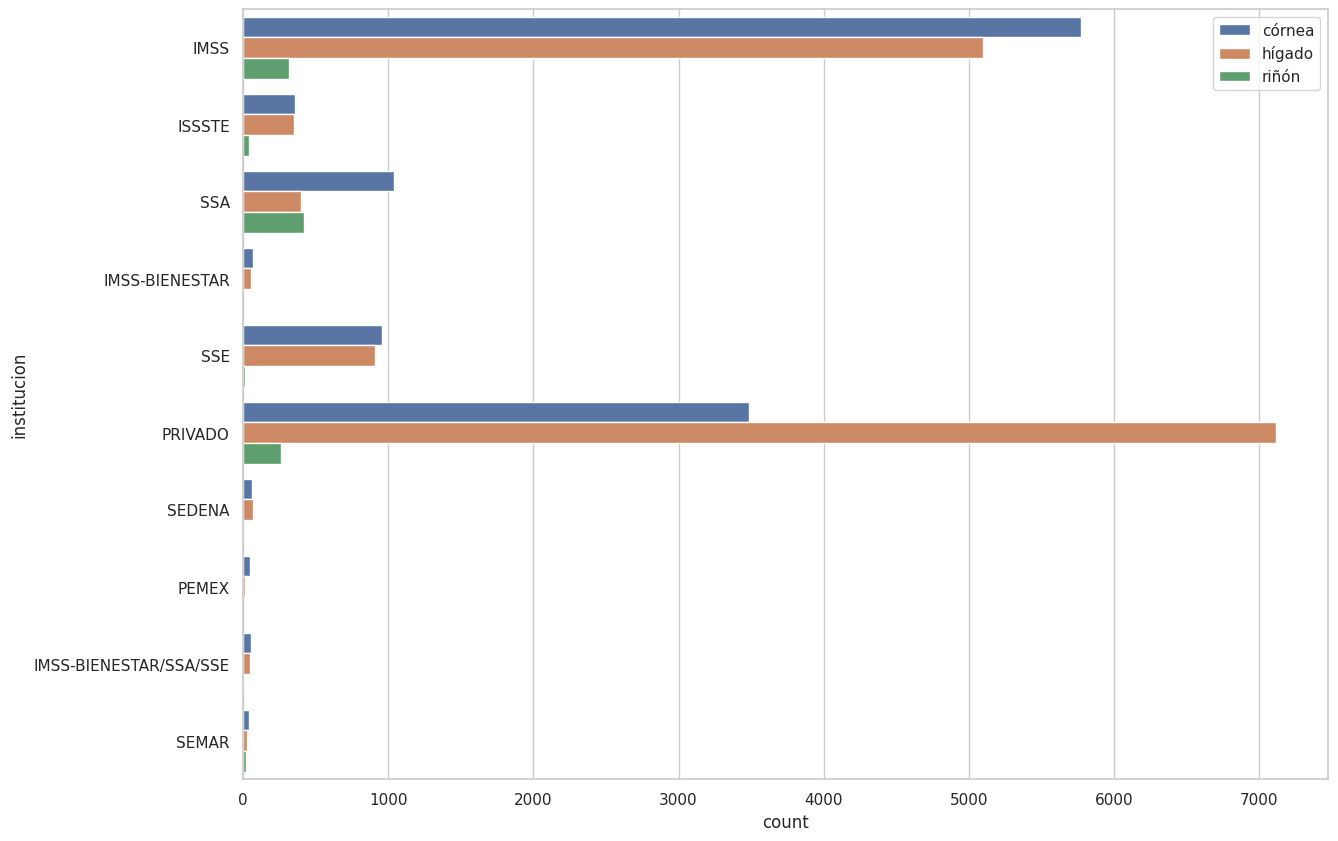

In [62]:
#cantidad de trasplantes realizados por institución y tipo de órgano trasplantado

import matplotlib.pyplot as plt

plot = sns.countplot(data=df[(df['institucion'].isin(top_inst)) &
                         (df['organo'].isin(organos_deseados))],
                     y='institucion',
                     hue='organo')


handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=organos_deseados)

plt.show()

**Análisis por institución**

*   Privado: Lidera  ampliamente en trasplantes de córnea.

*   IMSS: Muy activo en trasplantes de corazón, riñón y también córnea.


*   SSA Y SSE: Participan principalmente en trasplantes de córnea y corazón.

*   ISSSTE: Tiene actividad en los cuatro órganos, aunque en menor proporción.

*   IMSS-BIENESTAR, SEDENA, PEMEX, SEMAR: Prácticamente sin actividad relevante o con casos muy bajos.





<Axes: xlabel='rh', ylabel='grupo_sanguineo_receptor'>

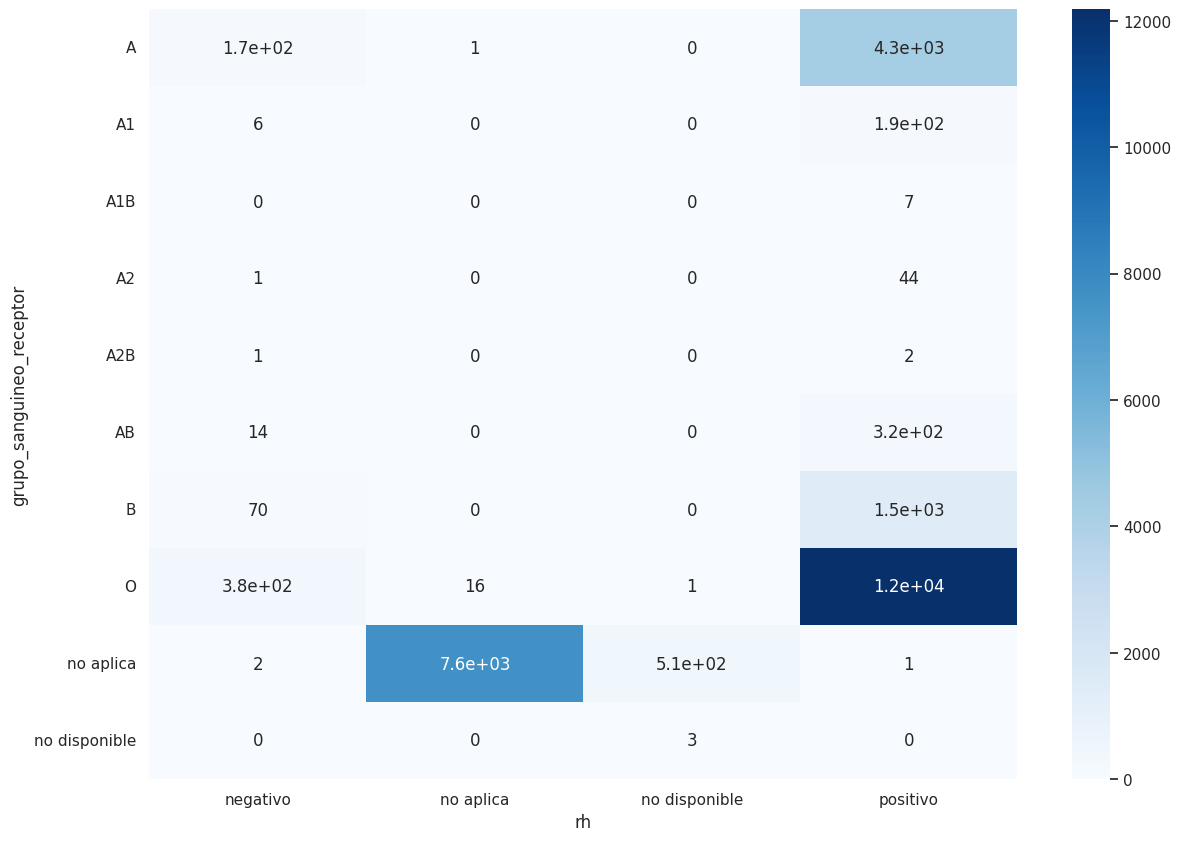

In [63]:
#Mapa de calor relación entre el grupo sanguíneo del receptor y su factor RH

import seaborn as sns
tabla = pd.crosstab(df['grupo_sanguineo_receptor'], df['rh'])
sns.heatmap(tabla, annot=True, cmap='Blues')


**Interpretación**



*  Dominancia del grupo O positivo:La celda con el valor más alto es Grupo O, RH positivo con 12,000 trasplantes seguida de A positivo ( 4300), B positivo (1500), AB positivo ( 320)

*  Grupos negativos: Mucho menos frecuentes

*  Categorías especiales:
"no aplica" y "no disponible" aparecen tanto en grupos como en RH.

"no aplica" como RH tiene más de 7600 casos, posiblemente por registros de córnea, donde el grupo sanguíneo puede no ser requerido.



<Axes: ylabel='count'>

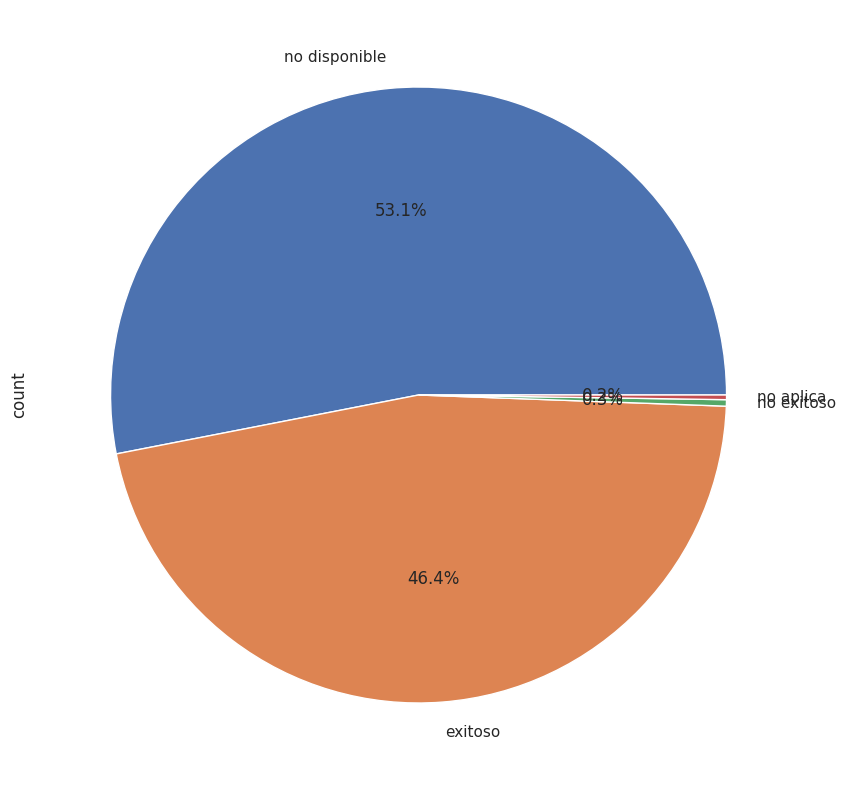

In [64]:
#Gráfico de pastel de resultados en 24 horas

df['resultado_24hrs'].value_counts().plot(kind='pie', autopct='%1.1f%%')


**Categías presentes**



*   no disponible: con 53.0% implica más de la mitad de los registros no tienen disponible el resultado a 24 horas, esto se puede deberse a falta de seguimientos, registros incompletos y procedimientos donde no aplica medir el resultado (ejemplo córnea)
*   Casi la mitad de los trasplantes fueron exitosos, segun lo documentado.

* Los trasplantes no exitosos son extremadamente poco en proporción al total, lo cual es positivo.



# Tipo de Transplante

| Tipo                 | Significado                                                                                                                                                                                                                             |
| -------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **cadáver**          | Trasplante realizado con un **órgano donado por una persona fallecida** (donante cadáver), bajo criterios de muerte encefálica o paro cardiaco. Es el tipo más común en programas públicos.                                             |
| **vivo**             | Trasplante con un **órgano donado por una persona viva**, usualmente un familiar directo (padres, hijos, hermanos), pero puede ser también un donante altruista compatible. Se da comúnmente en trasplante de riñón o parte del hígado. |
| **córnea importada** | Trasplante de **córnea proveniente del extranjero**, generalmente porque **no hay disponibilidad nacional** o hay convenios internacionales. Es un tejido y no un órgano sólido, por lo que su logística y regulación es distinta.      |

/tmp/ipython-input-2966518366.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




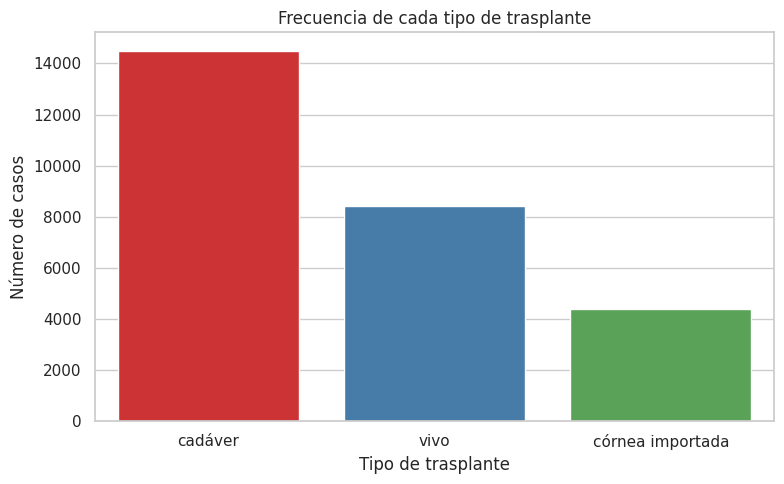

In [65]:
#Frecuencia de cada tipo de transplante

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='tipo_trasplante',
    order=df['tipo_trasplante'].value_counts().index,
    palette='Set1'
)
plt.title('Frecuencia de cada tipo de trasplante')
plt.xlabel('Tipo de trasplante')
plt.ylabel('Número de casos')
plt.xticks()
plt.tight_layout()
plt.show()

**Frecuencia de los tipos de  trasplantes**

El tipo de trasplante más común es el de cadáver, lo cual es típico para órganos como riñón, hígado o corazón.

Los trasplantes de donador vivo también son numerosos, especialmente para órganos como el riñón.

Las córneas importadas representan una fracción menor, pero significativa, del total.

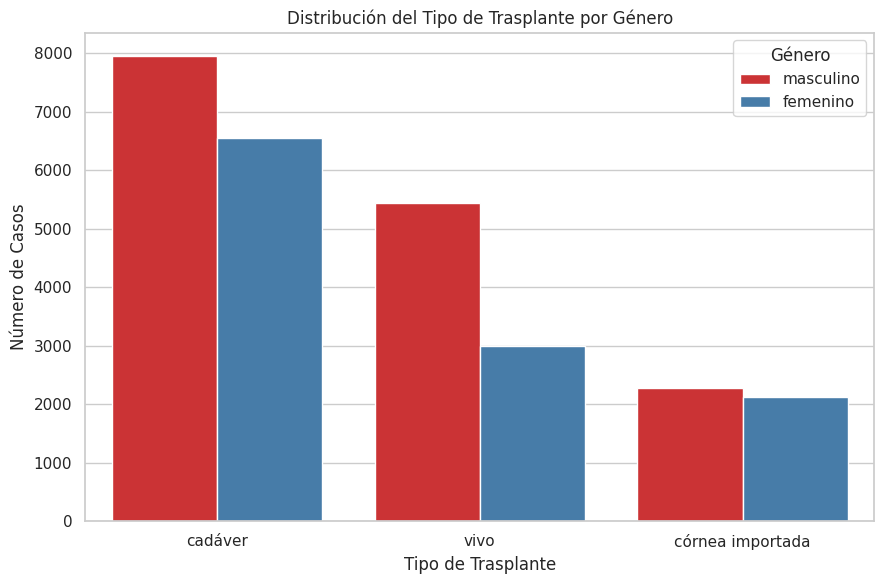

In [66]:
#Distribución del tipo de Transplante por Género

plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='tipo_trasplante', hue='sexo', palette='Set1')
plt.title('Distribución del Tipo de Trasplante por Género')
plt.xlabel('Tipo de Trasplante')
plt.ylabel('Número de Casos')
plt.legend(title='Género')
plt.tight_layout()
plt.show()


**Distribución del tipo de Transplante por Género**

*   Los trasplantes de tipo "cadáver" son los más frecuentes en ambos géneros.

*   Los hombres reciben más trasplantes de donadores vivos, lo cual podría reflejar diferencias clínicas o sociales (como compatibilidad entre familiares).

*   La córnea importada es el tipo de trasplante más equitativo entre géneros.

En general, los hombres reciben más trasplantes que las mujeres, pero la diferencia varía según el tipo.

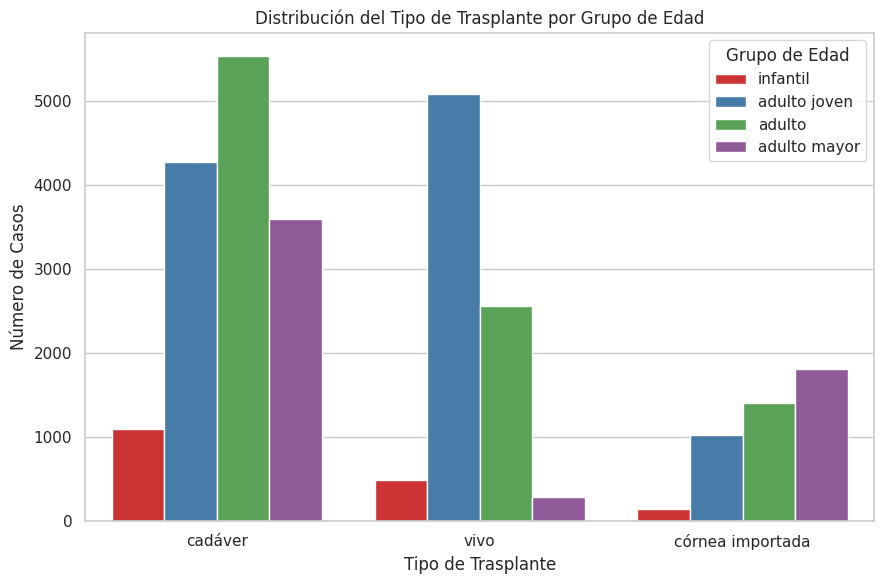

In [67]:
#Distribución del Tipo de Trasplante por Grupo de Edad

plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='tipo_trasplante', hue='grupo_edad', palette='Set1')
plt.title('Distribución del Tipo de Trasplante por Grupo de Edad')
plt.xlabel('Tipo de Trasplante')
plt.ylabel('Número de Casos')
plt.legend(title='Grupo de Edad')
plt.tight_layout()
plt.show()

**Análisis por tipo de trasplante**

1. **Cadáver**
* Muy común en adultos y adultos jóvenes, seguidos de adultos mayores.

* Grupo infantil con menor frecuencia, pero presente (1100 casos).

2.**Vivo**
* Adulto joven domina con más de 5000 casos.

*  Adulto también tiene un valor significativo (2600).

* Infantil y adulto mayor son mucho menos frecuentes.

3. **Córnea importada**
* La distribución está más balanceada.

*  El adulto mayor tiene la mayor frecuencia (1800).

* Sigue el adulto y luego el adulto joven.

* El grupo infantil tiene poca representación (menos de 200 casos).

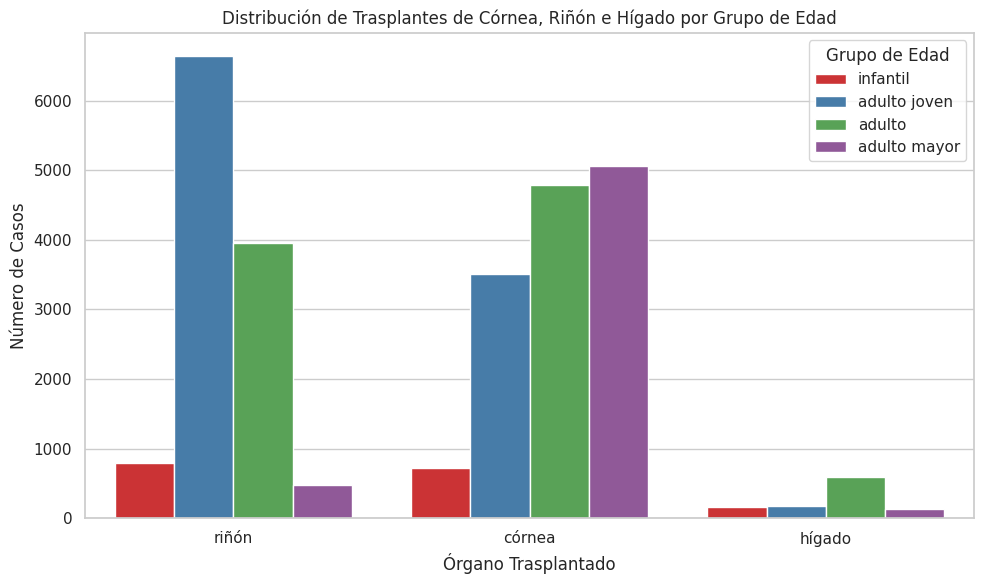

In [68]:
#Distribución de Trasplantes de Córnea, Riñón e Hígado por Grupo de Edad

organos_seleccionados = ['córnea', 'riñón', 'hígado']
df_filtrado = df[df['organo'].isin(organos_seleccionados)]


plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtrado, x='organo', hue='grupo_edad', palette='Set1')
plt.title('Distribución de Trasplantes de Córnea, Riñón e Hígado por Grupo de Edad')
plt.xlabel('Órgano Trasplantado')
plt.ylabel('Número de Casos')
plt.legend(title='Grupo de Edad')
plt.tight_layout()
plt.show()

**Análisis por órgano**

  **Riñón**  
* Adulto joven domina con más de 6600 casos.

* Seguido por adultos (4000).

* Infantil y adulto mayor tienen menos frecuencia (pero aún relevantes).

Esto refleja que el riñón es un órgano comúnmente trasplantado en personas jóvenes y de mediana edad.

**Córnea**

* Alta en adulto mayor (5100) y adulto (4800).

* También común en adulto joven (3500).

* Infantil está presente (750), aunque en menor proporción.

Este patrón sugiere que el deterioro de la visión por edad impulsa la necesidad de trasplante de córnea.

**Hígado**

* Mucho menos frecuente en general.

* Máxima incidencia en adultos (600).

* Muy baja en infantil, adulto joven y adulto mayor.

Esto puede deberse a que el hígado tiene criterios clínicos y de compatibilidad más estrictos.


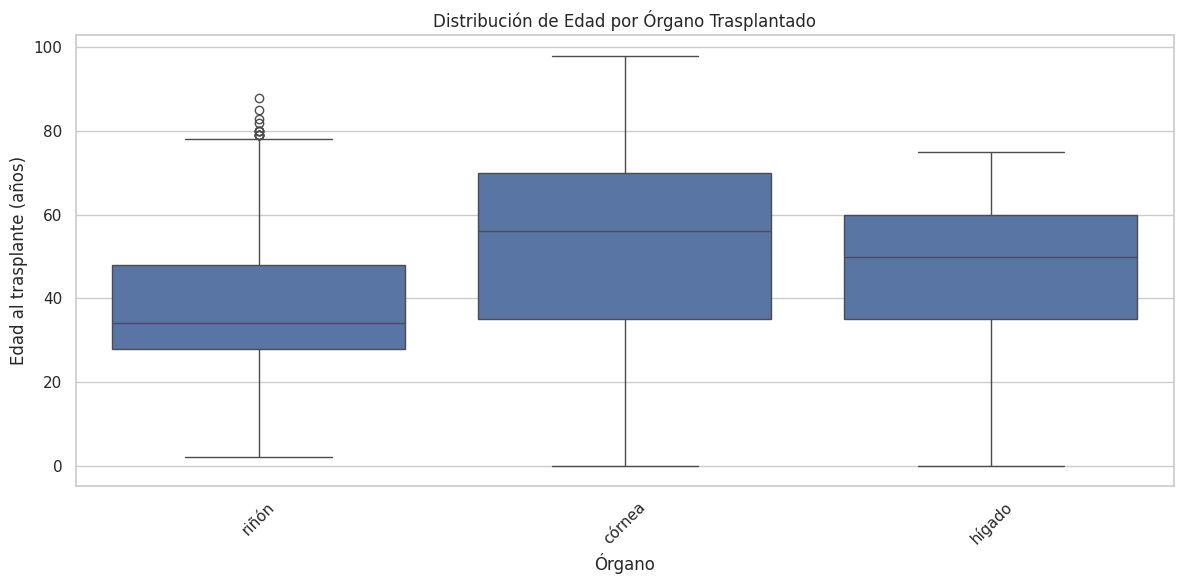

In [69]:
#Boxplot de edad por órgano

organos_seleccionados = ['córnea', 'riñón', 'hígado']
df_filtrado = df[df['organo'].isin(organos_seleccionados)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_filtrado , x='organo', y='edad_al_trasplante_anios')
plt.xticks(rotation=45)
plt.title("Distribución de Edad por Órgano Trasplantado")
plt.xlabel("Órgano")
plt.ylabel("Edad al trasplante (años)")
plt.tight_layout()
plt.show()

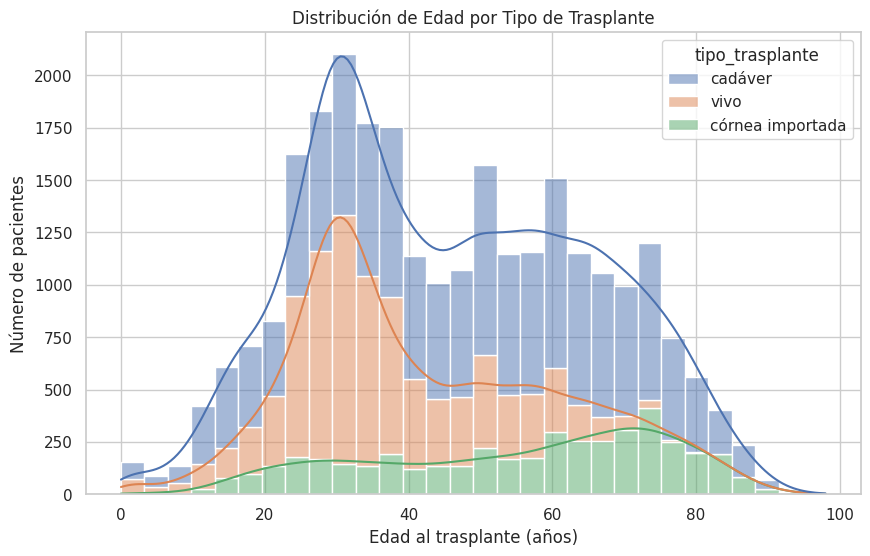

In [70]:
#Histograma de edades según tipo de trasplante


organos_seleccionados = ['córnea', 'riñón', 'hígado']
df_filtrado = df[df['organo'].isin(organos_seleccionados)]

plt.figure(figsize=(10,6))
sns.histplot(data=df_filtrado, x='edad_al_trasplante_anios', hue='tipo_trasplante', bins=30, kde=True, multiple='stack')
plt.title("Distribución de Edad por Tipo de Trasplante")
plt.xlabel("Edad al trasplante (años)")
plt.ylabel("Número de pacientes")
plt.show()


**Análisis por tipo de trasplante**

**Cadáver**
* Distribución bimodal: picos entre 30–40 años y 55–70 años.

* Muy amplio rango (desde jóvenes hasta adultos mayores).

* Es el tipo más frecuente en general.

**Vivo**
* Pico claro entre los 25 y 40 años.

* Decae rápidamente después de los 50.

* Casi inexistente en mayores de 70 años.

**Córnea importada**

* Aumenta a partir de los 50 años.

* Pico entre los 60 y 75 años, y sigue hasta casi los 90.

* Muy poco común antes de los 40.

<Figure size 1400x700 with 0 Axes>

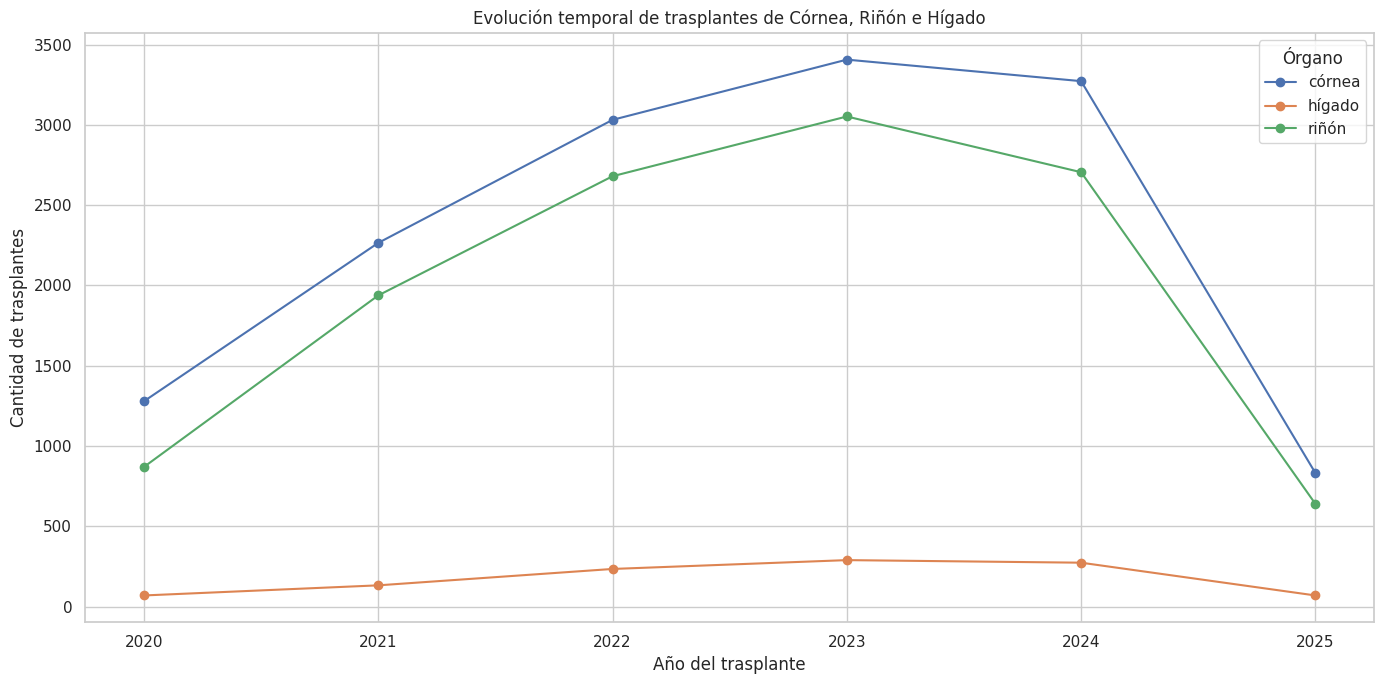

In [71]:
#Serie temporal

organos_seleccionados = ['córnea', 'riñón', 'hígado']
df_filtrado = df[df['organo'].isin(organos_seleccionados)]


plt.figure(figsize=(14, 7))
df_filtrado.groupby(['anio', 'organo']).size().unstack().plot(
    kind='line', marker='o', figsize=(14, 7)
)

plt.title('Evolución temporal de trasplantes de Córnea, Riñón e Hígado')
plt.xlabel('Año del trasplante')
plt.ylabel('Cantidad de trasplantes')
plt.grid(True)
plt.legend(title='Órgano')
plt.tight_layout()
plt.show()

* La edad al trasplante se mantiene relativamente estable entre 2020 y 2025.

* Esto sugiere que no ha habido un cambio en las políticas de selección de receptores en función de la edad.

* Puede haber ligeras variaciones, pero el perfil etario global se ha conservado.

# Visualización geográfica

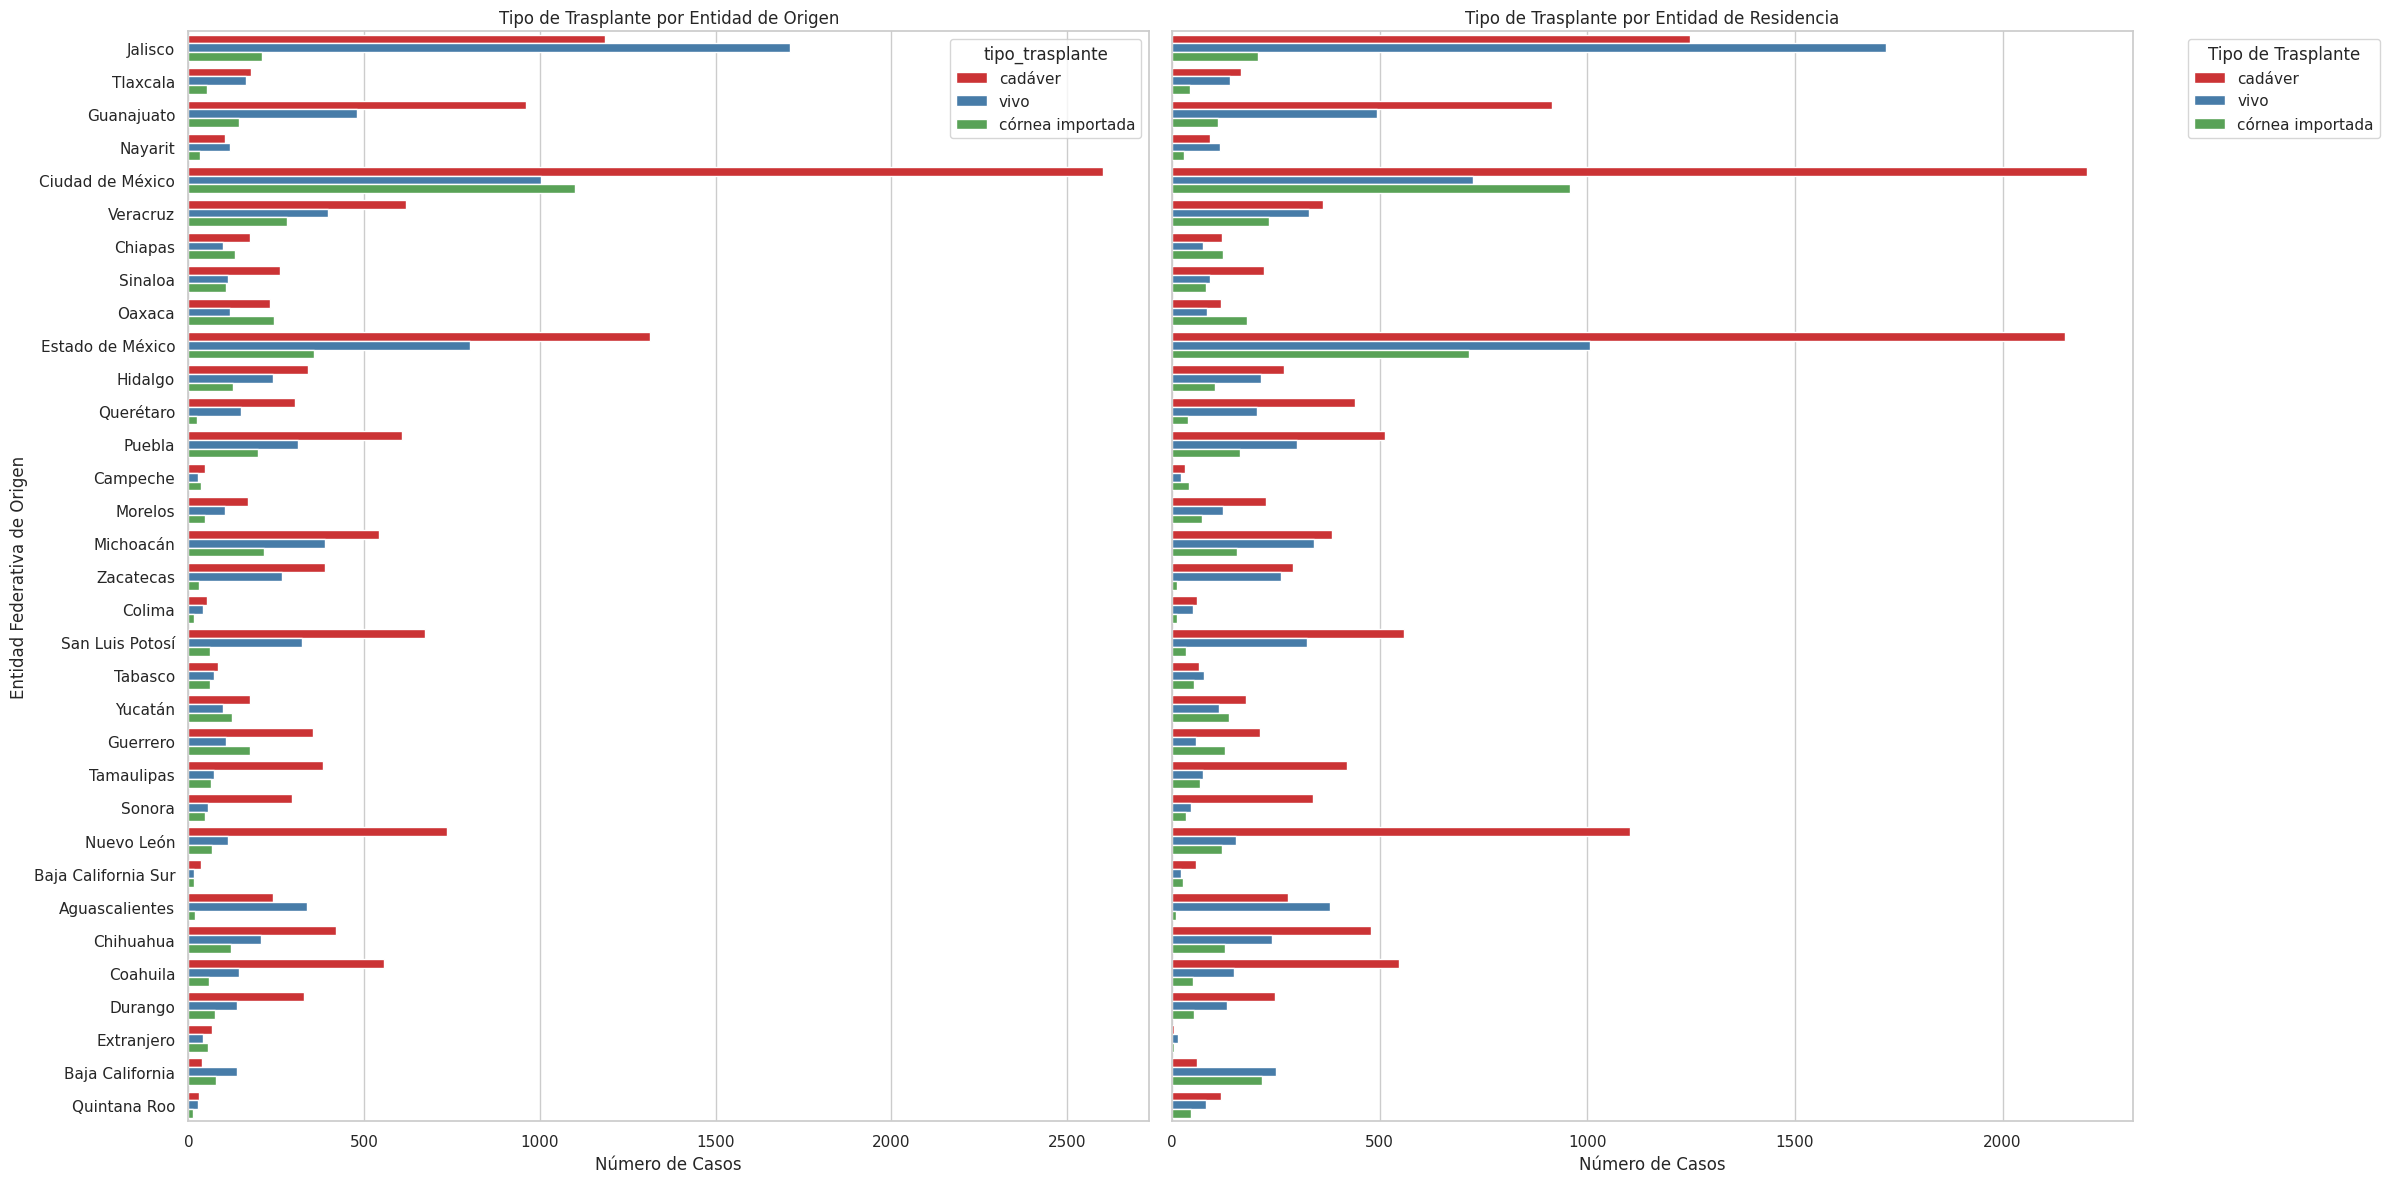

In [72]:
#Distribución del Tipo de Transplante por Entidad Federativa


import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(24, 12), sharey=True)

# Gráfico 1: origen
sns.countplot(
    data=df,
    y='entidad_federativa_origen',
    hue='tipo_trasplante',
    palette='Set1',
    ax=axes[0]
)
axes[0].set_title('Tipo de Trasplante por Entidad de Origen')
axes[0].set_xlabel('Número de Casos')
axes[0].set_ylabel('Entidad Federativa de Origen')

# Gráfico 2: residencia
sns.countplot(
    data=df,
    y='entidad_federativa_residencia',
    hue='tipo_trasplante',
    palette='Set1',
    ax=axes[1]
)
axes[1].set_title('Tipo de Trasplante por Entidad de Residencia')
axes[1].set_xlabel('Número de Casos')
axes[1].set_ylabel('Entidad federativa residencia')
axes[1].legend(title='Tipo de Trasplante', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Estados con más trasplantes:

**Ciudad de México** destaca con diferencia:

* Principalmente en trasplantes cadavéricos.

* También registra actividad notable en vivo y córnea importada.

Otros estados con alta actividad:

Jalisco

Estado de México

Veracruz

Puebla

Nuevo León

Estas entidades tienden a tener hospitales de alta especialidad o centros de referencia nacional.

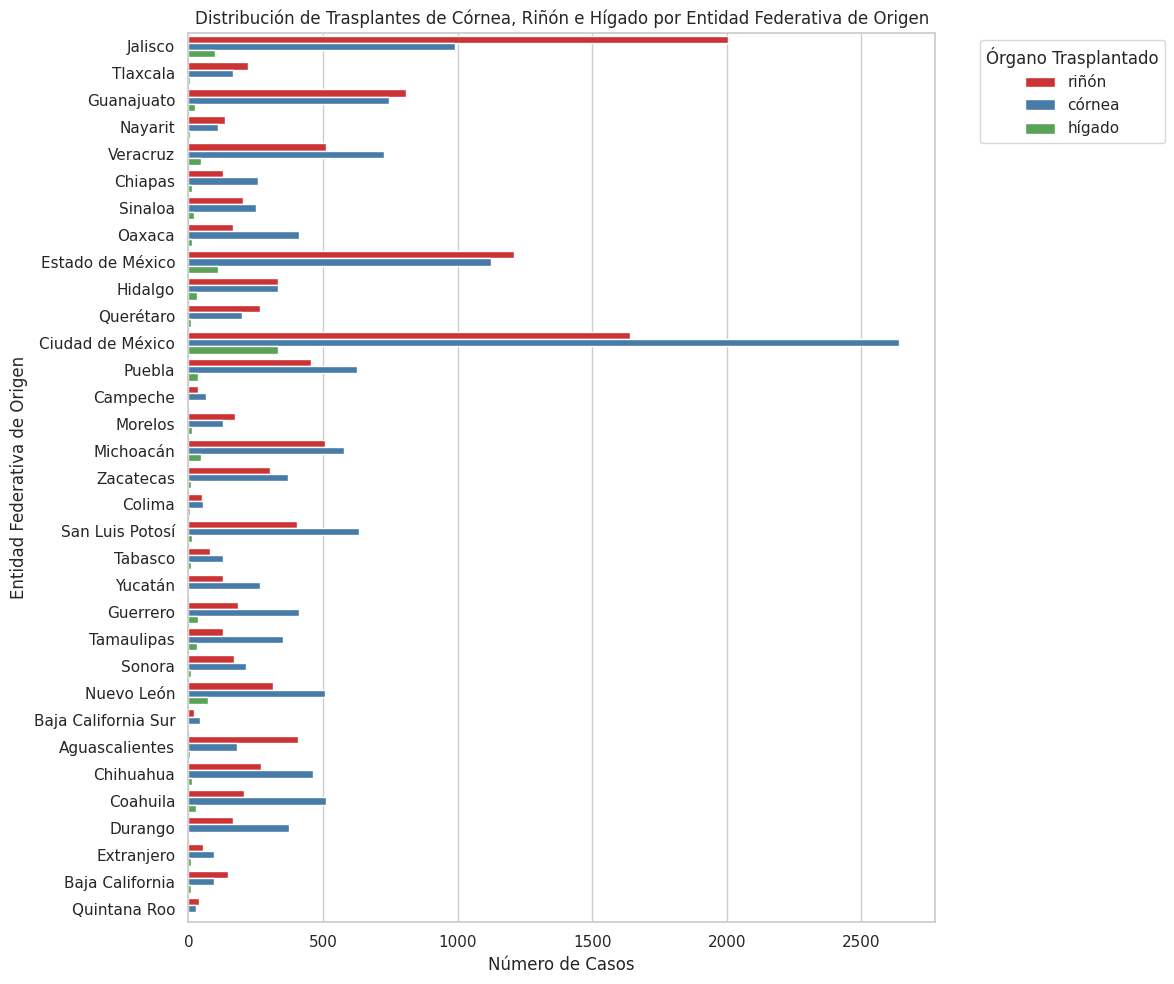

In [73]:
#Distribución de Trasplantes de Córnea, Riñón e Hígado por Entidad Federativa de Origen

organos_filtro = ['córnea', 'riñón', 'hígado']
df_top_organos = df[df['organo'].isin(organos_filtro)]

# Crear gráfico de barras horizontal
plt.figure(figsize=(12, 10))
sns.countplot(data=df_top_organos, y='entidad_federativa_origen', hue='organo', palette='Set1')
plt.title('Distribución de Trasplantes de Córnea, Riñón e Hígado por Entidad Federativa de Origen')
plt.xlabel('Número de Casos')
plt.ylabel('Entidad Federativa de Origen')
plt.legend(title='Órgano Trasplantado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Estados con mayor número total de trasplantes:
Ciudad de México es, por mucho, el estado con más trasplantes registrados, especialmente de córnea y riñón.

Le siguen:

Jalisco

Estado de México

Puebla

San Luis Potosí

Estas entidades son centros urbanos con alta concentración poblacional y mayor infraestructura médica especializada.

/tmp/ipython-input-1471644083.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




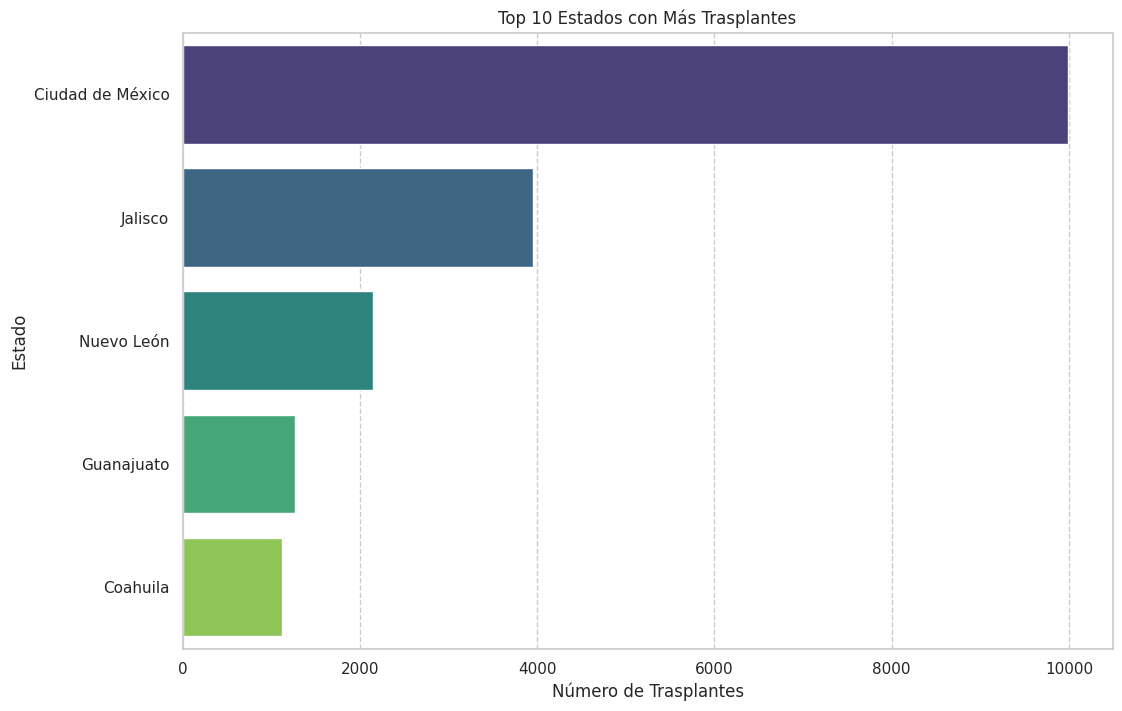

In [74]:
#Top 10 Estados con Más Trasplantes

top_10 = df['entidad_federativa_trasplante'].value_counts().nlargest(5)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
plt.title('Top 10 Estados con Más Trasplantes')
plt.xlabel('Número de Trasplantes')
plt.ylabel('Estado')
plt.grid(axis='x', linestyle='--')
plt.show()

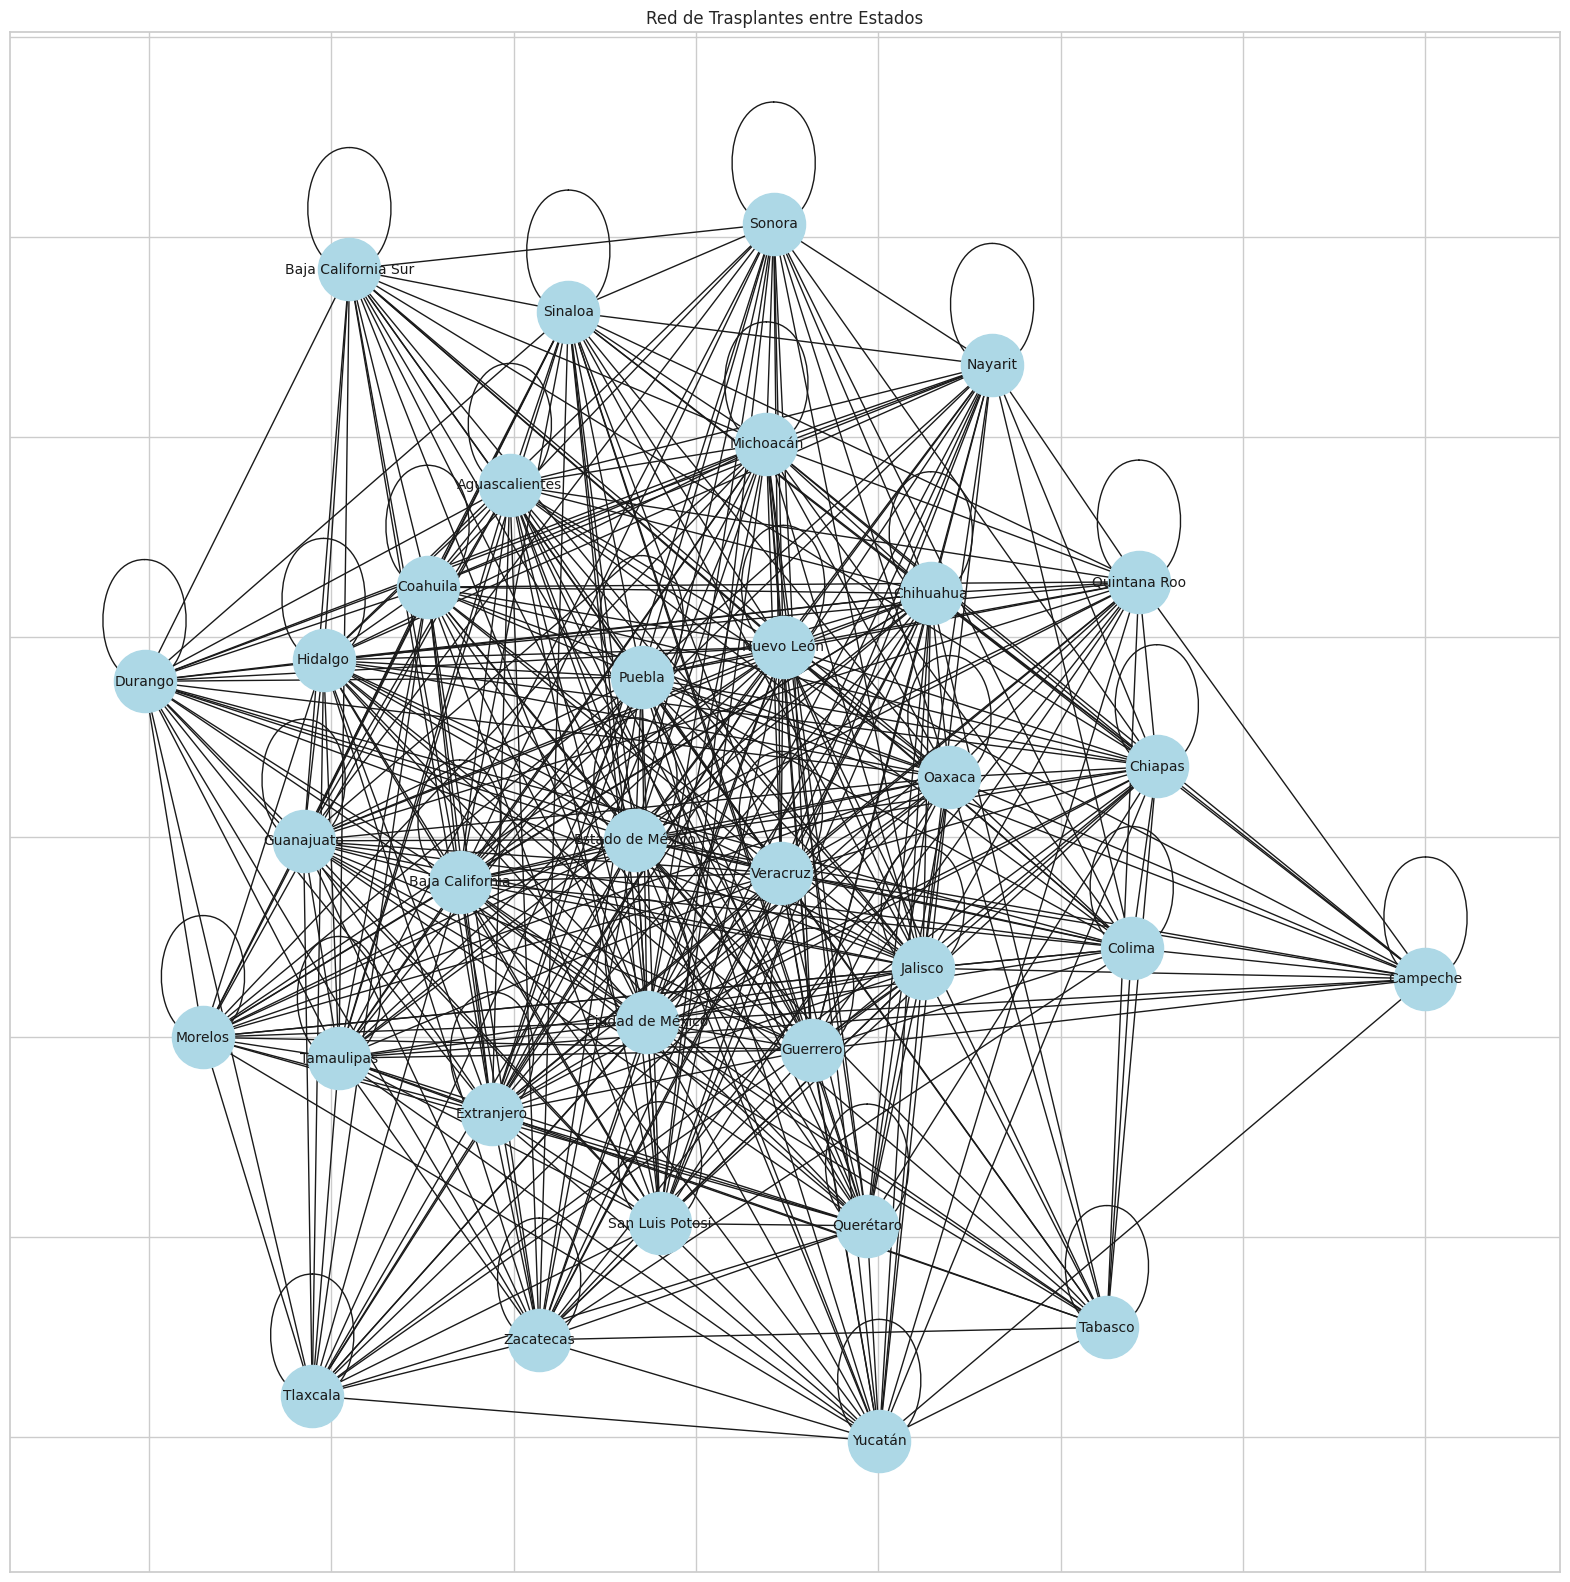

In [75]:
import networkx as nx

G = nx.from_pandas_edgelist(
    df,
    source='entidad_federativa_origen',
    target='entidad_federativa_residencia',
    edge_attr=True
)

plt.figure(figsize=(20, 20))
nx.draw_networkx(
    G,
    with_labels=True,
    node_size=2000,
    font_size=10,
    node_color='lightblue'
)
plt.title('Red de Trasplantes entre Estados')
plt.show()

Mapa cargado correctamente. Estados encontrados: 32
Datos de trasplantes procesados. Registros: 38
Estados con datos coincidentes: 28/32


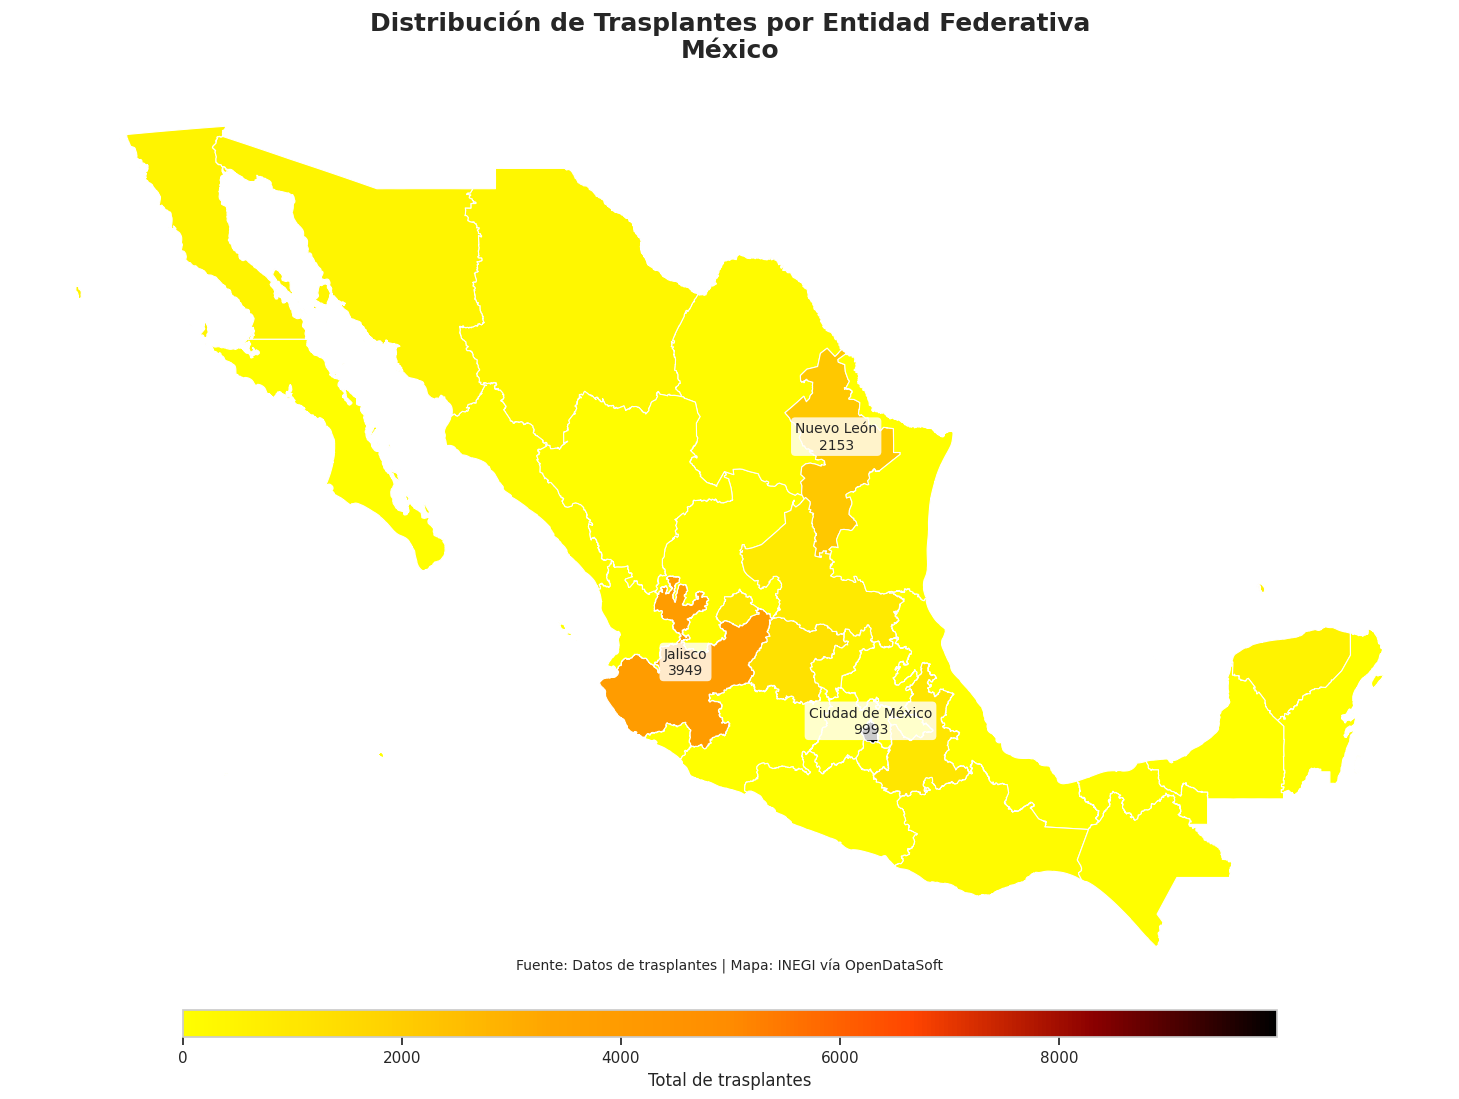

In [76]:
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial del estilo
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12

# Cargar el GeoJSON de los estados de México
try:
    url = "https://data.opendatasoft.com/explore/dataset/georef-mexico-state@public/download?format=geojson"
    mexico = gpd.read_file(url)
    print("Mapa cargado correctamente. Estados encontrados:", len(mexico))
except Exception as e:
    print(f"Error al cargar el GeoJSON: {e}")
    raise

# Preparar los datos geográficos
mexico = mexico.rename(columns={"sta_name": "entidad_federativa_trasplante"})

# Procesar los datos de trasplantes (asegúrate de que 'df' esté definido)
try:
    conteo = df['entidad_federativa_trasplante'].value_counts().reset_index()
    conteo.columns = ['entidad_federativa_trasplante', 'total_trasplantes']
    print("Datos de trasplantes procesados. Registros:", len(conteo))
except Exception as e:
    print(f"Error al procesar datos de trasplantes: {e}")
    raise

try:
    mapa = mexico.merge(conteo, on='entidad_federativa_trasplante', how='left')
    mapa['total_trasplantes'] = mapa['total_trasplantes'].fillna(0)
    print(f"Estados con datos coincidentes: {len(mapa[mapa['total_trasplantes'] > 0])}/{len(mexico)}")
except Exception as e:
    print(f"Error al combinar datos: {e}")
    raise


colors = ["#FFFF00", "#FFD700", "#FFA500", "#FF8C00", "#FF4500", "#8B0000", "#000000"]
cmap = LinearSegmentedColormap.from_list("yellow_to_black", colors)


fig, ax = plt.subplots(figsize=(16, 12))


mapa.plot(column='total_trasplantes',
          cmap=cmap,
          edgecolor='white',
          linewidth=0.8,
          ax=ax,
          legend=True,
          legend_kwds={
              'label': "Total de trasplantes",
              'orientation': "horizontal",
              'shrink': 0.7,
              'pad': 0.02,
              'aspect': 40
          })

top_estados = mapa.nlargest(3, 'total_trasplantes')
for idx, row in top_estados.iterrows():
    ax.annotate(text=f"{row['entidad_federativa_trasplante']}\n{int(row['total_trasplantes'])}",
                xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center',
                fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3",
                         fc="white",
                         ec="none",
                         alpha=0.8))


plt.title('Distribución de Trasplantes por Entidad Federativa\nMéxico',
          fontsize=18,
          pad=20,
          fontweight='bold')


plt.text(0.5, 0.02,
         'Fuente: Datos de trasplantes | Mapa: INEGI vía OpenDataSoft',
         transform=ax.transAxes,
         ha='center',
         fontsize=10)

ax.set_axis_off()
plt.tight_layout()
plt.show()

Estados con mayor número de trasplantes:
Ciudad de México — 10,010 trasplantes

Jalisco — 3,955

Nuevo León — 2,157


El mapa evidencia centralización del sistema de salud en ciertas regiones.

Visualmente, este tipo de mapa es muy útil para:

Identificar brechas geográficas

Guiar políticas de salud pública

Priorizar inversión en centros de trasplantes

In [77]:
import plotly.graph_objects as go


organos_filtrados = ['córnea', 'riñón', 'hígado']
df_filtrado = df[df['organo'].isin(organos_filtrados)]


conteo = df_filtrado.groupby(['tipo_trasplante', 'organo']).size().reset_index(name='count')


tipo_trasplante = conteo['tipo_trasplante'].unique().tolist()
organos = conteo['organo'].unique().tolist()
etiquetas = tipo_trasplante + organos


source = conteo['tipo_trasplante'].apply(lambda x: etiquetas.index(x)).tolist()
target = conteo['organo'].apply(lambda x: etiquetas.index(x)).tolist()
values = conteo['count'].tolist()


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=etiquetas
    ),
    link=dict(
        source=source,
        target=target,
        value=values
    ))])

fig.update_layout(title_text="Flujo entre Tipo de Trasplante y Órgano", font_size=12)
fig.show()

**De cadáver:**
Principalmente hacia córnea (muy ancho → 9,700 casos).

También hacia riñón y en menor medida hígado.

 **De córnea importada:**
Flujo exclusivo hacia córnea.

**De vivo:**
Casi todo el flujo va hacia riñón.

Mínimo hacia hígado (raro pero posible en trasplantes de donador vivo parcial).

# Modelado predictivo



*   Regresión Logística
*   Clasificador de bosque aleatorio



In [78]:
#Regresión Logística

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


columnas = [
    'tipo_trasplante',
    'sexo',
    'institucion',
    'entidad_federativa_trasplante',
    'organo',
    'relacion',
    'grupo_sanguineo_receptor',
    'rh'
]

df_modelo = df[columnas].dropna()

X = pd.get_dummies(df_modelo.drop(columns='tipo_trasplante'), drop_first=True)
y = df_modelo['tipo_trasplante']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión logística multiclase (estrategia multinomial con regularización)
modelo = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



In [79]:
# Evaluación

print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

         cadáver       0.96      0.92      0.94      2841
córnea importada       0.79      0.87      0.82       921
            vivo       1.00      1.00      1.00      1701

        accuracy                           0.94      5463
       macro avg       0.91      0.93      0.92      5463
    weighted avg       0.94      0.94      0.94      5463



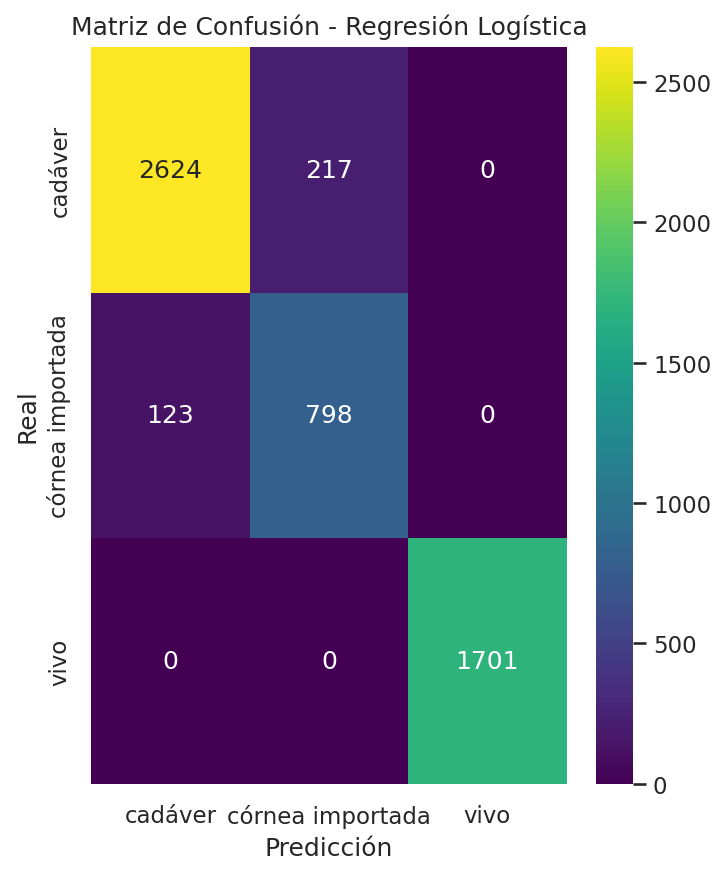

In [80]:
#Matriz de Confusión - Regresión Logística

matriz = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 6),dpi=150)
sns.heatmap(matriz, annot=True, fmt='d', cmap='viridis',
            xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.tight_layout()
plt.show()

**cadáver**
2624 predichos correctamente (verdaderos positivos).

217 mal clasificados como córnea importada.

0 mal clasificados como vivo.

 **córnea importada**
798 clasificados correctamente.

123 mal clasificados como cadáver.

**vivo**
1701 clasificados correctamente.
no hubo confusión con otras clases.

El modelo de regresión logística tiene excelente rendimiento general, especialmente con la clase vivo.

Las confusiones se dan principalmente entre cadáver y córnea importada, lo que sugiere que estas dos clases pueden compartir características similares en los datos de entrada.

No hay errores graves como clasificar vivo como cadáver, lo cual indica una buena separación entre clases.

In [81]:
#Clasificador de bosque aleatorio (RandomForestClassifier)

from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)


y_pred = modelo_rf.predict(X_test)


print(classification_report(y_test, y_pred))


                  precision    recall  f1-score   support

         cadáver       0.97      0.93      0.95      2841
córnea importada       0.80      0.91      0.85       921
            vivo       1.00      1.00      1.00      1701

        accuracy                           0.95      5463
       macro avg       0.92      0.94      0.93      5463
    weighted avg       0.95      0.95      0.95      5463



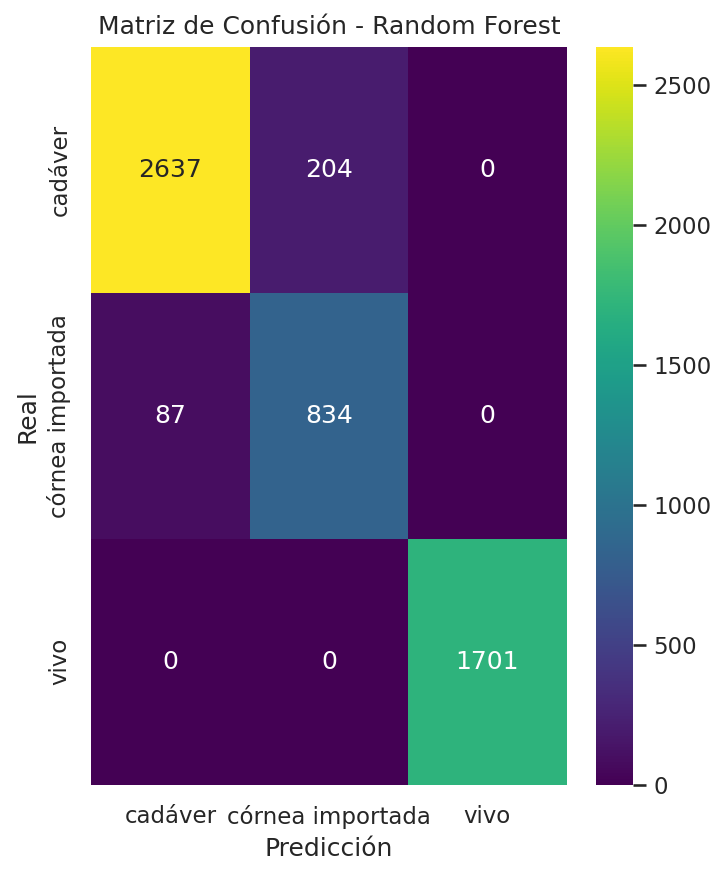

In [82]:
#Matriz de Confusión - Random Forest

matriz = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 6),dpi=150)
sns.heatmap(matriz, annot=True, fmt='d', cmap='viridis',
            xticklabels=modelo_rf.classes_, yticklabels=modelo_rf.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.tight_layout()
plt.show()

**cadáver**
2637 correctamente clasificados.

204 mal clasificados como córnea importada.

Mejoró levemente respecto al modelo de regresión logística (de 2624 a 2637 correctos).

**córnea importada**
834 clasificados correctamente.

87 mal clasificados como cadáver.

Mejoró notablemente (de 798 a 834 aciertos), y se redujeron los errores de 107 a 67.

**vivo**
1701 casos clasificados correctamente.

Sin errores, igual que en el modelo anterior.

El modelo Random Forest supera al modelo de regresión logística especialmente en la clasificación de córnea importada.


Random Forest es más robusto frente a ambigüedades entre cadáver y córnea importada, lo que probablemente se deba a su capacidad para manejar relaciones no lineales y múltiples variables relevantes.

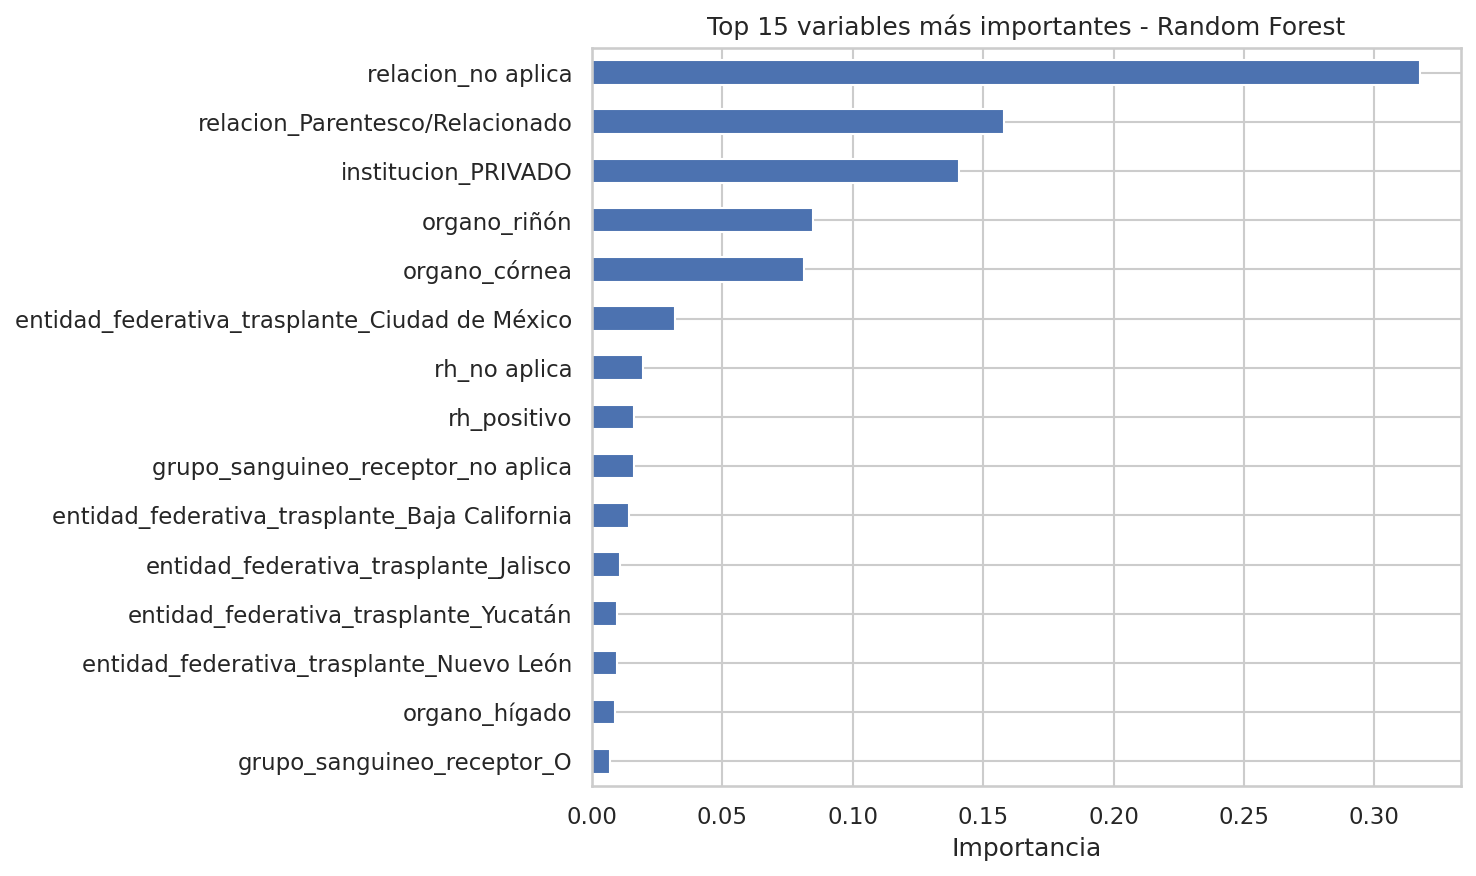

In [83]:
#visualizando las 15 variables más importantes según un modelo de Random Forest

importancias = pd.Series(modelo_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6),dpi=150)
importancias.head(15).plot(kind='barh')
plt.title('Top 15 variables más importantes - Random Forest')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Comparación de Regresión Logística vs. Random Forest



| Clase                | Modelo         | Precisión | Recall | F1-score |
| -------------------- | -------------- | --------- | ------ | -------- |
| **cadáver**          | Reg. Logística | 0.96      | 0.92   | 0.94     |
|                      | Random Forest  | 0.98      | 0.92   | 0.95     |
| **córnea importada** | Reg. Logística | 0.78      | 0.88   | 0.82     |
|                      | Random Forest  | 0.79      | 0.92   | 0.85     |
| **vivo**             | Ambos          | 1.00      | 1.00   | 1.00     |


- Ambos modelos son muy buenos, pero Random Forest tiene una ligera ventaja general.

- La mayor mejora se da en la clase "córnea importada", donde RF aumenta el recall del 88% al 92% y el F1-score del 82% al 85%.

- En la clase "vivo", ambos modelos predicen perfectamente.


**Predicción de organo transplantado**

En contextos donde no se conoce aún el tipo de trasplante (por ejemplo, en fases de planificación), un modelo que predigan el tipo de órgano puede ayudar a anticipar la probabilidad de ciertos órganos según las características del paciente. Esto permite mejorar la asignación de quirófanos, personal, y equipos específicos.

Un sistema inteligente puede asistir a los médicos en identificar automáticamente el órgano más probable a trasplantar en nuevos pacientes según características clínicas y demográficas.

Este gráfico permite visualizar el nivel de cobertura del seguimiento postoperatorio inmediato. Además, pone en evidencia la necesidad de mejorar el registro de resultados en el sistema.

/tmp/ipython-input-578641513.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




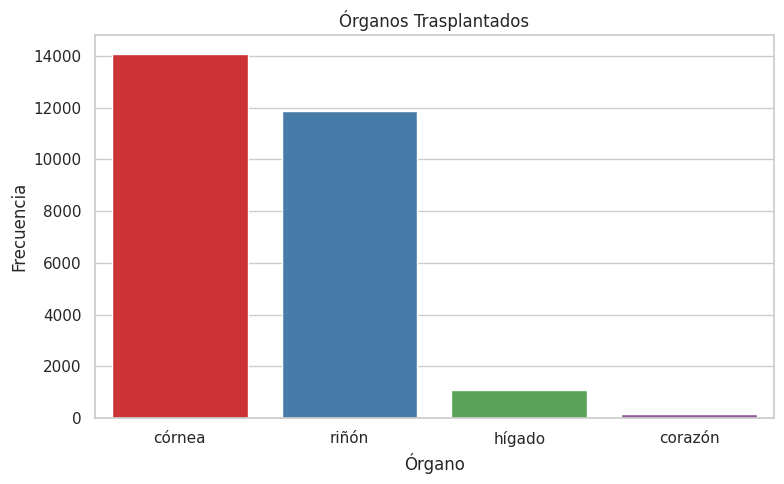

In [84]:
top_organos = df['organo'].value_counts().nlargest(4).index
df_filtrado = df[df['organo'].isin(top_organos)]

plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtrado, x='organo', order=top_organos, palette='Set1')
plt.title('Órganos Trasplantados')
plt.xlabel('Órgano')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

nos enfocamos en las 3 principales clases